In [4]:
import yfinance as yf

In [5]:
data = yf.download("TSLA", start="2015-01-01", end="2025-01-01")
data.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2015-01-02,14.620667,14.883333,14.217333,14.858000,71466000
2015-01-05,14.006000,14.433333,13.810667,14.303333,80527500
2015-01-06,14.085333,14.280000,13.614000,14.004000,93928500
2015-01-07,14.063333,14.318667,13.985333,14.223333,44526000
2015-01-08,14.041333,14.253333,14.000667,14.187333,51637500


In [6]:
data.shape

(2516, 5)

In [ ]:
import requests
from bs4 import BeautifulSoup

headlines = []

# Scrape multiple pages of Hacker News, but avoid duplicates
for page_num in range(1, 34):  # Scrape first 33 pages
    url = f"https://news.ycombinator.com/news?p={page_num}"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

    # Find all headlines on the page
    page_headlines = [a.text for a in soup.find_all('span', class_="titleline")]

    for headline in page_headlines:
        if headline not in headlines:
            headlines.append(headline)
    
    print(f"Page {page_num} Headlines:", page_headlines[:10]) 

# Print total number of unique headlines scraped
print(f"Total unique headlines scraped: {len(headlines)}")
print(headlines[:3])  # Print first 10 unique headlines

Page 1 Headlines: ['Decoding the 90s: Cryptography in Early Software Development (2023) (botanica.software)', 'LLMs understand nullability (dmodel.ai)', 'Why Catullus Continues to Seduce Us (newyorker.com)', "A startup doesn't need to be a unicorn (mattgiustwilliamson.substack.com)", 'Show HN: Uncurl.dev – Convert curl commands to a shareable, executable UI (uncurl.dev)', 'Rsync replaced with openrsync on macOS Sequoia (derflounder.wordpress.com)', 'Benchmarking LLM social skills with an elimination game (github.com/lechmazur)', 'Mass Grave of 150 Roman Soldiers Found Under Vienna Sports Field (gizmodo.com)', 'Glamorous Toolkit (gtoolkit.com)', 'We asked camera companies why their RAW formats are all different and confusing (theverge.com)']
Page 2 Headlines: ["GoboLinux 017.01: the most experimental Linux's first new release in about 5Y (gobolinux.org)", 'The Insanity of Being a Software Engineer (0x1.pt)', 'Foundry (YC F24) Is Hiring (ycombinator.com)', 'The “S” in MCP Stands for Secu

Page 13 Headlines: ['A deliberate practice app for guitar players who want to level up (captrice.io)', 'Show HN: Duolingo-style exercises but with real-world content like the news (fluentsubs.com)', 'Mitochondria transplants could cure diseases and lengthen lives (economist.com)', 'Vets Who Code (vetswhocode.io)', 'Why Kagi launched "no use, no pay" (getlago.substack.com)', 'Show HN: I made a little puzzle game about a rogue chess knight (rakhim.org)', 'Announcing Think Stats 3e (allendowney.com)', 'KOReader: Open-Source eBook Reader (github.com/koreader)', 'Faster Shuffling in Go with Batching (lemire.me)', 'Excitable cells (jenevoldsen.com)']
Page 14 Headlines: ['The Mainframe Vocabulary Problem, and Why It Matters (mainframesociety.com)', 'Show HN: Slipstream – A Python library for stateful stream processing (slipstream.readthedocs.io)', 'The average college student today (hilariusbookbinder.substack.com)', 'Show HN: Color palettes inspired by Mexican architecture (pointlessprojects

Page 25 Headlines: ["A 'fungi tile' with elephant skin texture to cool buildings (ntu.edu.sg)", 'Classifying aviation-related posts on Hacker News with SLMs (skysight.inc)', 'Programs compiled with recent D compiler are broken in macOS 15.4 (github.com/dlang)', 'Parrots and humans share a brain mechanism for speech (sciencenews.org)', 'Images trapped in a feedback loop and analog fractals create each other (youtube.com)', 'The Biology of B-Movie Monsters (2003) (uchicago.edu)', 'Minecraft Server in FreeBSD Jails Container (vermaden.wordpress.com)', "Show HN: Docsumo's OCR Benchmark Report – Surpassing Mistral and Landing AI (docsumo.com)", 'First Retinal Treatment to Restore Damaged Vision (businesskorea.co.kr)', 'Are labels like autism and ADHD more constraining than liberating? (theconversation.com)']
Page 26 Headlines: ['Disk I/O bottlenecks in GitHub Actions (depot.dev)', 'Swiftly 1.0 (swift.org)', 'Show HN Pianoboi – displays sheet music as you play your piano (pianoboi.site)', 'A

In [8]:
data = data[['Close','Volume']]
data

Price,Close,Volume
Ticker,TSLA,TSLA
Date,,
2015-01-02,14.620667,71466000
2015-01-05,14.006000,80527500
2015-01-06,14.085333,93928500
2015-01-07,14.063333,44526000
2015-01-08,14.041333,51637500
...,...,...
2024-12-24,462.279999,59551800
2024-12-26,454.130005,76366400


In [9]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    text = text.lower()
    
    text = text.translate(str.maketrans('','',string.punctuation))
    token=word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    token = [word for word in token if word not in stop_words]
    
    return ' '.join(token)

cleaned_headlines = [preprocess_text(headline) for headline in headlines]
print(cleaned_headlines)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ankita\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ankita\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['decoding 90s cryptography early software development 2023 botanicasoftware', 'llms understand nullability dmodelai', 'catullus continues seduce us newyorkercom', 'startup doesnt need unicorn mattgiustwilliamsonsubstackcom', 'show hn uncurldev – convert curl commands shareable executable ui uncurldev', 'rsync replaced openrsync macos sequoia derflounderwordpresscom', 'benchmarking llm social skills elimination game githubcomlechmazur', 'mass grave 150 roman soldiers found vienna sports field gizmodocom', 'glamorous toolkit gtoolkitcom', 'asked camera companies raw formats different confusing thevergecom', 'mathematics crochet hellohartblogwordpresscom', 'deterministic simulation testing async rust s2dev', 'im manually transcribing altairbasic source ten lines day starting today codebergorg', 'deepmind program finds diamonds minecraft without taught naturecom', 'cursed excel 12145660 quadratichqcom', 'multiwavelength look proxima centauris flares centauridreamsorg', 'dire wolf back new

In [10]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
sentiments = [analyzer.polarity_scores(headline) for headline in headlines]
compound_score = [sentiment['compound'] for sentiment in sentiments]

for headline, score in zip(headlines, compound_score):
    sentiment_label = 'Positive' if score>0 else 'Negative' if score<0 else 'Neutral'
    print(f'Headline: {headline}\nSentiment Score: {score:.3f} ({sentiment_label})\n')

Headline: Decoding the 90s: Cryptography in Early Software Development (2023) (botanica.software)
Sentiment Score: 0.000 (Neutral)

Headline: LLMs understand nullability (dmodel.ai)
Sentiment Score: 0.000 (Neutral)

Headline: Why Catullus Continues to Seduce Us (newyorker.com)
Sentiment Score: 0.000 (Neutral)

Headline: A startup doesn't need to be a unicorn (mattgiustwilliamson.substack.com)
Sentiment Score: 0.000 (Neutral)

Headline: Show HN: Uncurl.dev – Convert curl commands to a shareable, executable UI (uncurl.dev)
Sentiment Score: 0.000 (Neutral)

Headline: Rsync replaced with openrsync on macOS Sequoia (derflounder.wordpress.com)
Sentiment Score: 0.000 (Neutral)

Headline: Benchmarking LLM social skills with an elimination game (github.com/lechmazur)
Sentiment Score: 0.000 (Neutral)

Headline: Mass Grave of 150 Roman Soldiers Found Under Vienna Sports Field (gizmodo.com)
Sentiment Score: -0.382 (Negative)

Headline: Glamorous Toolkit (gtoolkit.com)
Sentiment Score: 0.511 (Posit

In [11]:
data['Close']

Ticker,TSLA
Date,
2015-01-02,14.620667
2015-01-05,14.006000
2015-01-06,14.085333
2015-01-07,14.063333
2015-01-08,14.041333
...,...
2024-12-24,462.279999
2024-12-26,454.130005
2024-12-27,431.660004


In [12]:
print(data['Close'].isnull().sum())
print(data['Close'].min())
print(data['Close'].max())

Ticker
TSLA    0
dtype: int64
Ticker
TSLA    9.578
dtype: float64
Ticker
TSLA    479.859985
dtype: float64


In [13]:
data.sort_index(inplace=True)
print(data.head())

Price           Close    Volume
Ticker           TSLA      TSLA
Date                           
2015-01-02  14.620667  71466000
2015-01-05  14.006000  80527500
2015-01-06  14.085333  93928500
2015-01-07  14.063333  44526000
2015-01-08  14.041333  51637500


In [14]:
data.loc[:,'Moving_Avg']=data['Close'].rolling(window=10).mean()
data.head(15)

Price,Close,Volume,Moving_Avg
Ticker,TSLA,TSLA,
Date,,,
2015-01-02,14.620667,71466000,NaN
2015-01-05,14.006000,80527500,NaN
2015-01-06,14.085333,93928500,NaN
2015-01-07,14.063333,44526000,NaN
2015-01-08,14.041333,51637500,NaN
2015-01-09,13.777333,70024500,NaN
2015-01-12,13.480667,89254500,NaN
2015-01-13,13.616667,67159500,NaN


In [ ]:
## backward fill the Nan values
data['Moving_Avg'] = data['Moving_Avg'].fillna(method='bfill')
print(data.head(15))

Price           Close     Volume Moving_Avg
Ticker           TSLA       TSLA           
Date                                       
2015-01-02  14.620667   71466000  13.732867
2015-01-05  14.006000   80527500  13.732867
2015-01-06  14.085333   93928500  13.732867
2015-01-07  14.063333   44526000  13.732867
2015-01-08  14.041333   51637500  13.732867
2015-01-09  13.777333   70024500  13.732867
2015-01-12  13.480667   89254500  13.732867
2015-01-13  13.616667   67159500  13.732867
2015-01-14  12.846000  173278500  13.732867
2015-01-15  12.791333   78247500  13.732867
2015-01-16  12.871333   54048000  13.557933
2015-01-20  12.795333   67548000  13.436866
2015-01-21  13.104667   62295000  13.338800
2015-01-22  13.441333   61753500  13.276600
2015-01-23  13.419333   51579000  13.214400


In [17]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'])
scaler1 = MinMaxScaler(feature_range=(0, 1))
senti_scaled = scaler1.fit_transform(np.array(compound_score).reshape(-1, 1))

In [18]:
print(scaled_data.shape)

(2516, 1)


In [19]:
print(f"Length of scaled_data: {scaled_data.shape[0]}")
print(f"Length of senti_scaled: {senti_scaled.shape[0]}")

Length of scaled_data: 2516
Length of senti_scaled: 929


In [20]:
senti_filled = np.zeros_like(senti_scaled)
senti_filled = np.pad(senti_scaled, (0,len(scaled_data)- len(senti_scaled)),'edge')
print(f"Length of scaled_data: {scaled_data.shape[0]}")
print(f"Length of senti_filled: {senti_filled.shape[0]}")

Length of scaled_data: 2516
Length of senti_filled: 2516


In [21]:
import numpy as np

def create_sequence(data,sentiment_data, window_size=30):
    X, y=[],[]
    for i in range(len(data)-window_size):
        x_stock = data[i:i +window_size,0]
        x_senti = sentiment_data[i:i + window_size,0]
        
        X.append(np.column_stack((x_stock,x_senti)))
        
        y.append(data[i + window_size,0])
        
    return np.array(X), np.array(y)

window_size=30
X,y = create_sequence(scaled_data,senti_filled, window_size)

print(X.shape,y.shape)

(2486, 30, 2) (2486,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Model Definition
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(30, 2)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Predicting a single value

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

C:\Users\Ankita\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 30, 50)              │          10,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,851 (120.51 KB)

 Trainable params: 30,851 (120.51 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# Train-test split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model on test data
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0232
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0018
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0018
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0015
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0015
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0021
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0012
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0018
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0012
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0011
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0010    
Test Loss: 0.0013664797879755497


In [ ]:
predictions = model.predict(X_test)

# Invert the scaling to get actual stock prices
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Check the predictions and actual values
print(predictions[:10])  
print(y_test_actual[:10])  

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step
[[121.707825]
 [120.71961 ]
 [120.37371 ]
 [120.78731 ]
 [121.685684]
 [122.7637  ]
 [124.541115]
 [126.4438  ]
 [128.18741 ]
 [130.17104 ]]
[[119.76999664]
 [118.84999847]
 [123.22000122]
 [123.55999756]
 [122.40000153]
 [131.49000549]
 [128.77999878]
 [127.16999817]
 [133.41999817]
 [143.75      ]]


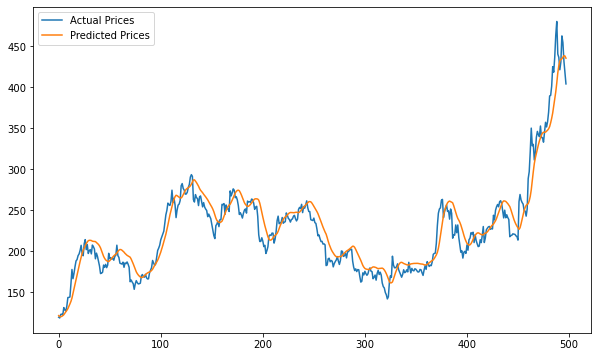

In [25]:
# Plot the predicted vs actual stock prices
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, label='Actual Prices')
plt.plot(predictions, label='Predicted Prices')
plt.legend()
plt.show()

In [27]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)